In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv')
display(insurance_df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Data Manipulation

In [3]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Data Pre-Processing Label Encoder

In [4]:
insurance_df['sex'].drop_duplicates()

0    female
1      male
Name: sex, dtype: object

In [5]:
insurance_df['smoker'].drop_duplicates()

0    yes
1     no
Name: smoker, dtype: object

In [6]:
insurance_df['region'].drop_duplicates()

0    southwest
1    southeast
3    northwest
8    northeast
Name: region, dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
# Training the LabelEncoder preprocessing model with unique values 
le.fit(insurance_df['sex'].drop_duplicates())

LabelEncoder()

In [9]:
insurance_df['sex'] = le.transform(insurance_df['sex'])

In [10]:
# Training the LabelEncoder preprocessing model with unique values 
le.fit(insurance_df['smoker'].drop_duplicates())
insurance_df['smoker'] = le.transform(insurance_df['smoker'])

In [11]:
# Training the LabelEncoder preprocessing model with unique values 
le.fit(insurance_df['region'].drop_duplicates())
insurance_df['region'] = le.transform(insurance_df['region'])

In [12]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


#### EDA

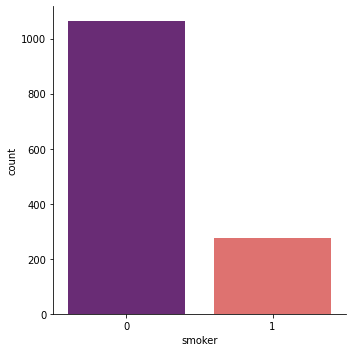

In [13]:
# Count of Smoker & Non-Smoker
sns.catplot(x = 'smoker', kind = 'count', data = insurance_df, palette = 'magma')

In [14]:
insurance_df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


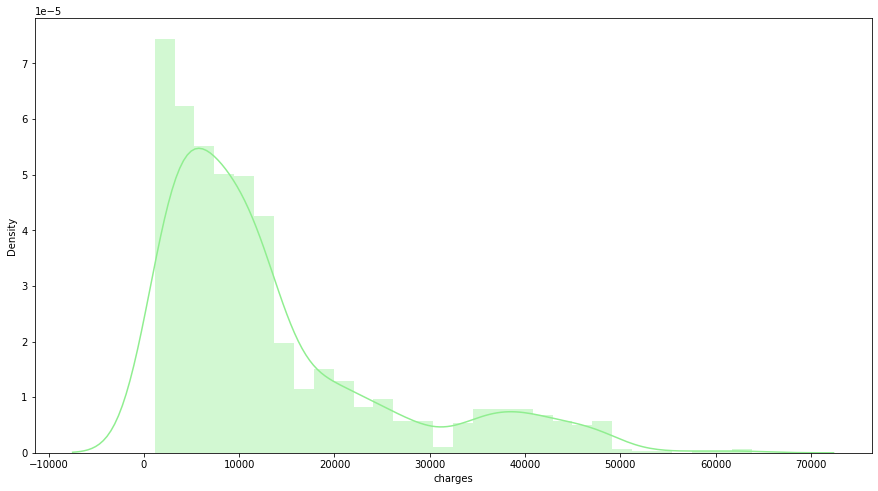

In [15]:
plt.figure(figsize = (15,8))
sns.distplot(insurance_df['charges'], color = 'lightgreen')
plt.show()

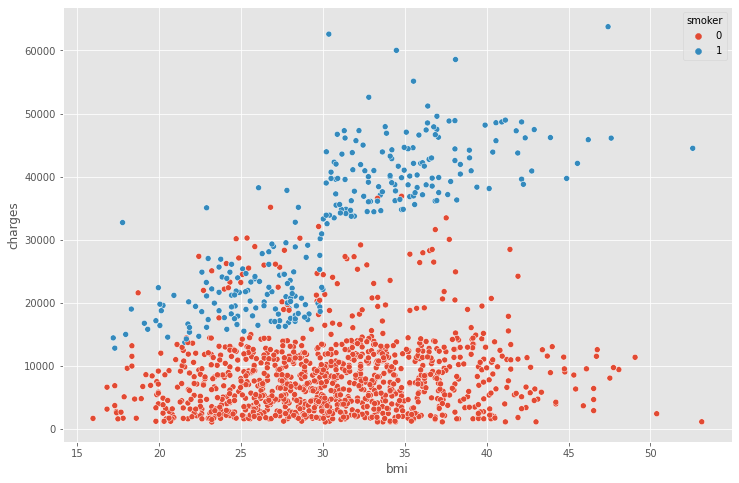

In [16]:
### Analysis of Distribution b/w BMI & Charges
plt.style.use("ggplot")
plt.figure(figsize = (12,8))
sns.scatterplot( x = "bmi", y = "charges", data = insurance_df, hue = 'smoker')

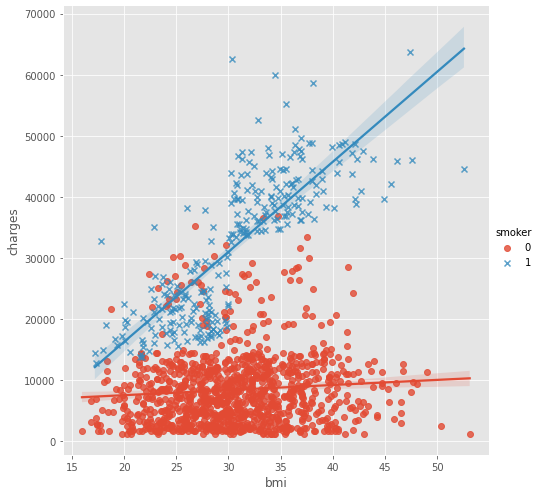

In [26]:
plt.style.use("ggplot")
sns.lmplot( x = "bmi", y = "charges", data = insurance_df, hue = 'smoker', markers = ["o", "x"], height=7)

#### Correlation
  * For features selection

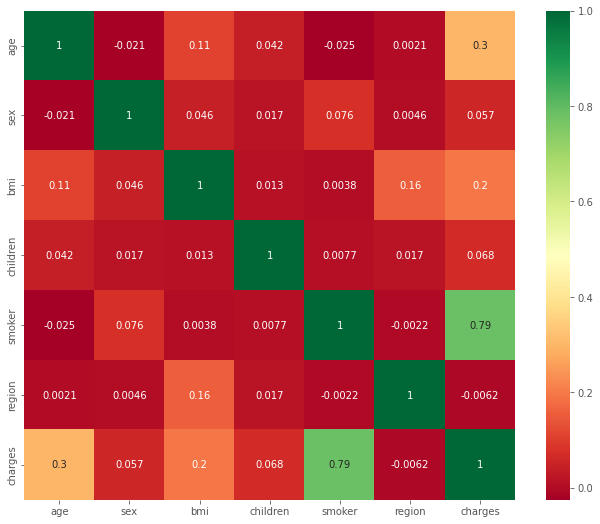

In [27]:
plt.figure(figsize = (11,9))
# -1 to +1 -> > + or -0.85 , closer to 0 (not to select the these features)
sns.heatmap(insurance_df.corr(), annot = True, cmap = 'RdYlGn')

#### Split into Train & Test

In [28]:
X = insurance_df.drop('charges', axis = 1)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [29]:
Y = insurance_df['charges']

#### Cross Validation 
  * Splitting samples into train & test samples randomnly

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [35]:
len(x_train)

1070

#### ANN Regression

In [31]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

In [32]:
def build_model():
    # Sequential Neural Network - FeedForward NN
    model = Sequential()
    # Units = Num of Neurons (2 * pow(n)), input shape = num of features.
    model.add(Dense(units = 128, activation = 'relu', input_shape = [len(X.keys())]))
    # Hidden Layer - I
    model.add(Dense(units = 256, activation = 'relu'))
    # Hidden Layer - II
    model.add(Dense(units = 512, activation = 'relu'))
    # Output Layer - Regression
    model.add(Dense(units = 1))
    
    # Optimizers - To converge the loss
    optimizers = RMSprop(learning_rate = 0.001)

    # Model Compiler
    model.compile(loss = 'mean_squared_error', optimizer = optimizers, metrics = ['mean_squared_error',
                                                                                  'mean_absolute_error'])
    return model

In [33]:
model = build_model()

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [36]:
# epochs = Number of Iterations
# batch size = samples per steps in each epochs
history = model.fit(x_train, y_train, epochs = 700, batch_size = 25, validation_split = 0.2)

Epoch 1/700
35/35 [==============================] - 2s 20ms/step - loss: 256357120.0000 - mean_squared_error: 256357120.0000 - mean_absolute_error: 11070.5928 - val_loss: 208547120.0000 - val_mean_squared_error: 208547120.0000 - val_mean_absolute_error: 8910.8564
Epoch 2/700
35/35 [==============================] - 0s 8ms/step - loss: 131029304.0000 - mean_squared_error: 131029304.0000 - mean_absolute_error: 8088.5806 - val_loss: 142877248.0000 - val_mean_squared_error: 142877248.0000 - val_mean_absolute_error: 9770.6377
Epoch 3/700
35/35 [==============================] - 0s 9ms/step - loss: 125391520.0000 - mean_squared_error: 125391520.0000 - mean_absolute_error: 8830.9912 - val_loss: 142272096.0000 - val_mean_squared_error: 142272096.0000 - val_mean_absolute_error: 9762.6719
Epoch 4/700
35/35 [==============================] - 0s 7ms/step - loss: 124018144.0000 - mean_squared_error: 124018144.0000 - mean_absolute_error: 8785.3076 - val_loss: 143188672.0000 - val_mean_squared_error

In [38]:
pd.DataFrame(history.history)

,loss,mean_squared_error,mean_absolute_error,val_loss,val_mean_squared_error,val_mean_absolute_error
0,256357120.0,256357120.0,11070.592773,208547120.0,208547120.0,8910.856445
1,131029304.0,131029304.0,8088.580566,142877248.0,142877248.0,9770.637695
2,125391520.0,125391520.0,8830.991211,142272096.0,142272096.0,9762.671875
3,124018144.0,124018144.0,8785.307617,143188672.0,143188672.0,9435.079102
4,124095408.0,124095408.0,8829.411133,147567232.0,147567232.0,8988.400391
...,...,...,...,...,...,...
695,17951766.0,17951766.0,2493.192871,50428788.0,50428788.0,3730.479736
696,18304982.0,18304982.0,2419.525146,34390608.0,34390608.0,3355.724609
697,18270286.0,18270286.0,2477.438965,32670094.0,32670094.0,4287.268066
698,17618092.0,17618092.0,2452.590820,32815324.0,32815324.0,4272.080078


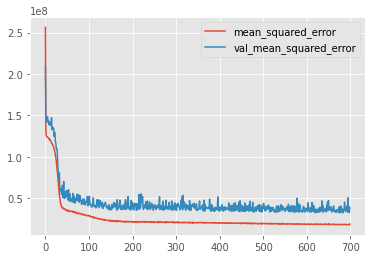

In [39]:
pd.DataFrame(history.history)[['mean_squared_error', 'val_mean_squared_error']].plot()

##### NN Reg. Model Performance

In [40]:
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 20341106.0000 - mean_squared_error: 20341106.0000 - mean_absolute_error: 2214.7949


[20341106.0, 20341106.0, 2214.794921875]

In [41]:
# Yhat
predictions = model.predict(x_test)

In [44]:
from sklearn.metrics import r2_score
# coeff of determination (0-1) 
# variance of predicted o/p from actual o/p
r2_score(y_test, predictions)

0.8721729964136304

In [45]:
# RMSE 
from sklearn.metrics import mean_squared_error
# MSE
np.sqrt(mean_squared_error(y_test, predictions))

4510.111557871845

#### Making New Prediction

In [46]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [53]:
x_new = [[29,	1,	37.61,	1,	1,	3]]

In [54]:
np.round(model.predict(x_new))

array([[37417.]], dtype=float32)